## ニューラルネットワークの構築

In [ ]:
# 必要なライブラリのインポート
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定

from common import functions
from common import optimizer
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original', data_home=".")

# データセットのロード
# iris.data = [(がく片の長さ , がく片の幅 , 花びらの長さ , 花びらの幅)]
house = pd.read_csv('housing.csv', header=0)

x_vals = np.array([x[0:13] for x in house.values])
y_vals = np.array([x[13] for x in house.values])
# x_vals = house.iloc[:,:-1]
# y_vals = house.iloc[:,-1]
print(x_vals.shape)
print(y_vals.shape)
# トレーニングデータ（80％）とテストデータ（20％）に分割
x_train, x_test, y_train, y_test = train_test_split(x_vals, y_vals, test_size=0.4, shuffle=True)

In [ ]:
class LayerNet:
    
    # コンストラクタ
    def __init__(self):
        self.input_size = 13
        self.hidden_size1 = 20
        self.hidden_size2 = 8
        self.output_size = 1
        self.batch_size = 2
        self.weight_init = 0.05
        self.learning_rate = 0.001
    
    # ネットワークの初期化を実施
    def init_network(self):
        network = {}
    
        # 重みの設定
        # 通常設定
        network['W1'] = self.weight_init * np.random.randn(self.input_size, self.hidden_size1)
        network['W2'] = self.weight_init * np.random.randn(self.hidden_size1, self.hidden_size2)
        network['W3'] = self.weight_init * np.random.randn(self.hidden_size2, self.output_size)

#         # Xavierでの設定
#         network['W1'] = np.random.randn(input_layer_size, hidden_layer_size1) / (np.sqrt(input_layer_size))
#         network['W2'] = np.random.randn(hidden_layer_size1, hidden_layer_size2) / (np.sqrt(hidden_layer_size1))
#         network['W3'] = np.random.randn(hidden_layer_size2, output_layer_size) / (np.sqrt(hidden_layer_size2))

        # Heでの設定
#         network['W1'] = np.random.randn(self.input_size, self.hidden_size1) / (np.sqrt(self.input_size)) * np.sqrt(2)
#         network['W2'] = np.random.randn(self.hidden_size1, self.hidden_size2) / (np.sqrt(self.hidden_size1)) * np.sqrt(2)
#         network['W3'] = np.random.randn(self.hidden_size2, self.output_size) / (np.sqrt(self.hidden_size2)) * np.sqrt(2)

        # バイアスの設定
        network['b1'] = np.zeros(self.hidden_size1)
        network['b2'] = np.zeros(self.hidden_size2)
        network['b3'] = np.zeros(self.output_size)

        return network
    
    def gradient(self, network, x_vec, y_vec):
        # ランダムにバッチを取得    
        batch_mask = np.random.choice(len(x_vec), self.batch_size)
        # ミニバッチに対応する教師訓練ラベルデータを取得    
        x_batch = x_vec[batch_mask]
        # ミニバッチに対応する訓練正解ラベルデータを取得する
        y_batch = y_vec[batch_mask]
        y_batch = y_batch[:, np.newaxis]

        z1, z2, y = self.forward(network, x_batch)
        grad = self.backward(x_batch, y_batch, z1, z2, y)

        # optimizerの設定 モメンタムを利用
        opt = optimizer.Momentum(self.learning_rate)
        opt.update(network, grad)
        
        return y_batch, y
    
    # 順伝播
    def forward(self, network, x):
        W1, W2, W3 = network['W1'], network['W2'], network['W3']
        b1, b2, b3 = network['b1'], network['b2'], network['b3']

        # 勾配
        u1 = np.dot(x, W1) + b1
        # 活性化関数 Relu関数を使用
        z1 = functions.relu(u1)
        # 勾配
        u2 = np.dot(z1, W2) + b2
        # 活性化関数 Relu関数を使用
        z2 = functions.relu(u2)
        # 勾配
        u3 = np.dot(z2, W3) + b3
        # 誤差関数(恒等写像)
        y = u3

        return z1, z2, y

    # 逆伝播
    def backward(self, x, d, z1, z2, y):
        grad = {}

        W1, W2, W3 = network['W1'], network['W2'], network['W3']
        b1, b2, b3 = network['b1'], network['b2'], network['b3']

        # 出力層でのデルタ 
        delta3 = functions.d_least_square(d, y)
        # b3の勾配
        grad['b3'] = np.sum(delta3, axis=0)
        # W3の勾配
        grad['W3'] = np.dot(z2.T, delta3)
        # 活性化関数の導関数 Relu関数
        delta2 = np.dot(delta3, W3.T) * functions.d_relu(z2)
        # b2の勾配
        grad['b2'] = np.sum(delta2, axis=0)
        # W2の勾配
        grad['W2'] = np.dot(z1.T, delta2)
        # 活性化関数の導関数 Relu関数
        delta1 = np.dot(delta2, W2.T) * functions.d_relu(z1)
        # b1の勾配
        grad['b1'] = np.sum(delta1, axis=0)
        # W1の勾配
        grad['W1'] = np.dot(x.T, delta1)

        return grad

Generation: 10. 誤差 = 1180.0626092266402
Generation_Test: 10. 誤差(テスト) = 510.64661428329856
Generation: 20. 誤差 = 287.9809026247063
Generation_Test: 20. 誤差(テスト) = 758.1276984110777
Generation: 30. 誤差 = 238.57756743067517
Generation_Test: 30. 誤差(テスト) = 525.6235742657623
Generation: 40. 誤差 = 77.43356497873978
Generation_Test: 40. 誤差(テスト) = 165.29215812633248
Generation: 50. 誤差 = 126.302301472846
Generation_Test: 50. 誤差(テスト) = 165.47932507425134
Generation: 60. 誤差 = 207.71485235171951
Generation_Test: 60. 誤差(テスト) = 435.6326040446887
Generation: 70. 誤差 = 161.44039391102504
Generation_Test: 70. 誤差(テスト) = 75.76131233225829
Generation: 80. 誤差 = 9.057120880924458
Generation_Test: 80. 誤差(テスト) = 0.03783897675393036
Generation: 90. 誤差 = 74.41659458003159
Generation_Test: 90. 誤差(テスト) = 141.49707553805834
Generation: 100. 誤差 = 106.53297800461513
Generation_Test: 100. 誤差(テスト) = 24.432700981161958
Generation: 110. 誤差 = 2.77973297539117
Generation_Test: 110. 誤差(テスト) = 6.472563680109014
Generation: 120. 誤

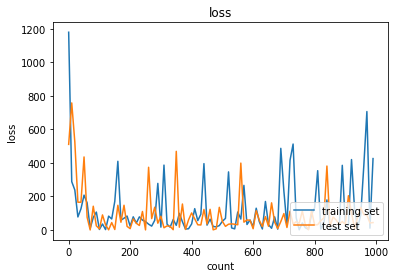

In [14]:
# 学習回数(1000回)
learning_num = 1000

# 描写頻度
plot_interval=10

layerNet = LayerNet()

# パラメータの初期化
network = layerNet.init_network()

losses = []
losses_test = []

for i in range(learning_num):
    # 訓練用の学習
    y_batch, y = layerNet.gradient(network, x_train, y_train)

    # テスト用の学習
    y_test_batch, y_t = layerNet.gradient(network, x_test, y_test)
    
    if (i + 1) % plot_interval == 0:
        loss = functions.least_square(y_batch, y)
        losses.append(loss)
        print('Generation: ' + str(i+1) + '. 誤差 = ' + str(loss))
        loss_test = functions.least_square(y_test_batch, y_t)
        losses_test.append(loss_test)
        print('Generation_Test: ' + str(i+1) + '. 誤差(テスト) = ' + str(loss_test))

lists = range(0, learning_num, plot_interval)
plt.plot(lists, losses, label="training set")
plt.plot(lists, losses_test, label="test set")
plt.legend(loc="lower right")
plt.title("loss")
plt.xlabel("count")
plt.ylabel("loss")
# グラフの表示
plt.show()